<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE

In [3]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Harsaroop/COMP-3710-Project-2/main/Bias_correction_ucl%20-%20Copy.csv')
data = data.round(decimals = 3)
data = data.dropna()

#dropping date as not needed in analysis 
data = data.drop('Date' ,axis = 1)

In [4]:
X = data[:].drop(['Present_Tmax'], axis = 1)
y = data['Present_Tmax']

In [5]:
# split into input (X) and output (Y) variables
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2)
#for i in range(len(train_X)):
print(train_X.shape, train_y.shape)

(6200, 23) (6200,)


In [11]:
dt = DTR(criterion='mse',
         max_depth=10, 
         min_samples_leaf=0.005,
         random_state=5)

In [12]:
dt.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf=0.005,
                      random_state=5)

In [13]:
Y_pred = dt.predict(test_X)

RMSE =  1.6803720054256774


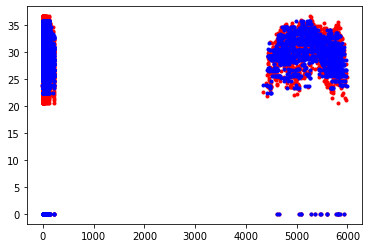

In [14]:
from matplotlib import test
mse_dt = MSE(test_y, Y_pred)
rmse_dt = mse_dt**(1/2)
print('RMSE = ',rmse_dt)
#Plotting Graph
plt.plot(test_X, test_y, 'r.')
plt.plot(test_X, Y_pred, 'b.')
plt.show()